In [12]:
# Imports and settings
import numpy as np
import matplotlib.pyplot as plt

# Gaussian Initialization

Weights $W$ are initialized using a normal distribution defined as:

$$W \sim \mathcal{N}(0, \sigma^2)$$

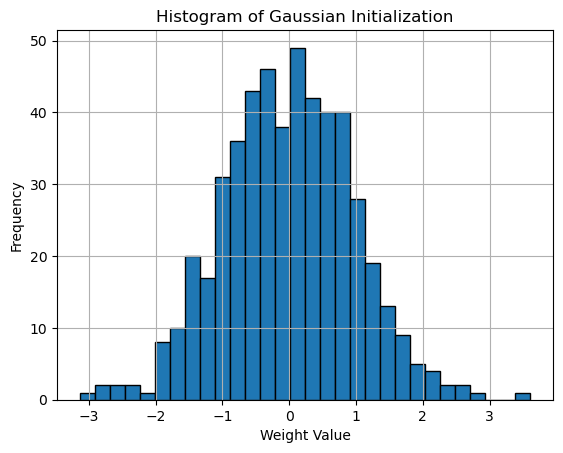

In [22]:
np.random.seed(96)

# Define input and output sizes
input_size, output_size = 2, 256

# Generate normal distribution
weights_normal = np.random.randn(input_size, output_size)

# Plot histogram
plt.hist(weights_normal.flatten(), bins=30, edgecolor='black')
plt.title('Histogram of Gaussian Initialization')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Xavier Initialization

$$W \sim \mathcal{N}(0, \frac{1}{n_{\text{in}}})$$

where $\mathcal{N}(0, \frac{1}{n_{\text{in}}})$ is the standart normal distribution with the mean 0 and the variance $\frac{1}{n_{\text{in}}}$.

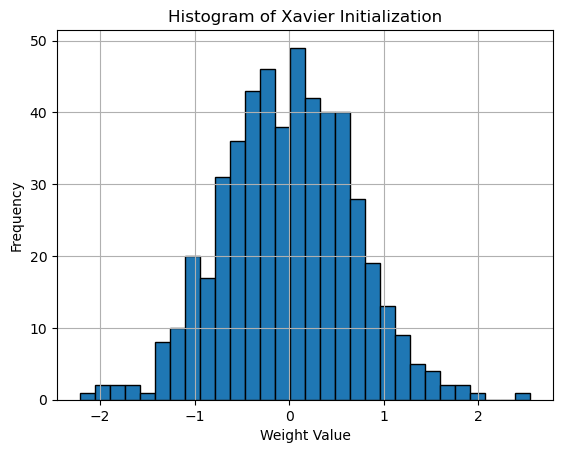

In [24]:
np.random.seed(96)

# Define input and output sizes
input_size, output_size = 2, 256

# Generate normal distribution
N = np.random.randn(input_size, output_size)

# Xavier initialization (variance multiplier)
weights_xavier = N * np.sqrt(1. / input_size)

# Plot histogram
plt.hist(weights_xavier.flatten(), bins=30, edgecolor='black')
plt.title('Histogram of Xavier Initialization')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Kaiming (He) init

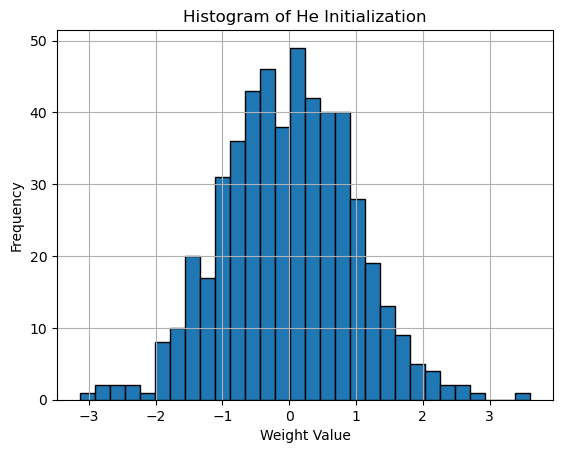

In [25]:
np.random.seed(96)

# Define input and output sizes
input_size, output_size = 2, 256

# Generate normal distribution
N = np.random.randn(input_size, output_size)

# He initialization
weights_he = N * np.sqrt(2. / input_size)

# Plot histogram
plt.hist(weights_he.flatten(), bins=30, edgecolor='black')
plt.title('Histogram of He Initialization')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# He Initialization for LeakyReLU (LeakyHe)

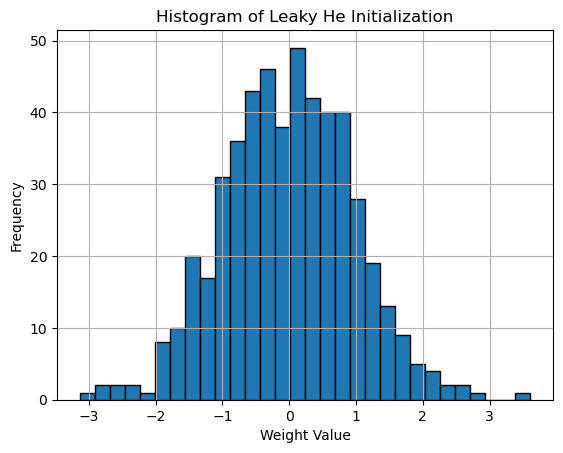

In [36]:
np.random.seed(96)

# Define input and output sizes and LeakyReLU alpha
input_size, output_size = 2, 256
alpha = 0.01  # LeakyReLU negative slope

# Generate normal distribution
N = np.random.randn(input_size, output_size)

# He initialization for LeakyReLU
weights_he_leaky = N * np.sqrt(2. / ((1 + alpha**2) * input_size))

# Plot histogram
plt.hist(weights_he_leaky.flatten(), bins=30, edgecolor='black')
plt.title('Histogram of Leaky He Initialization')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot: Comparing Initialization Methods

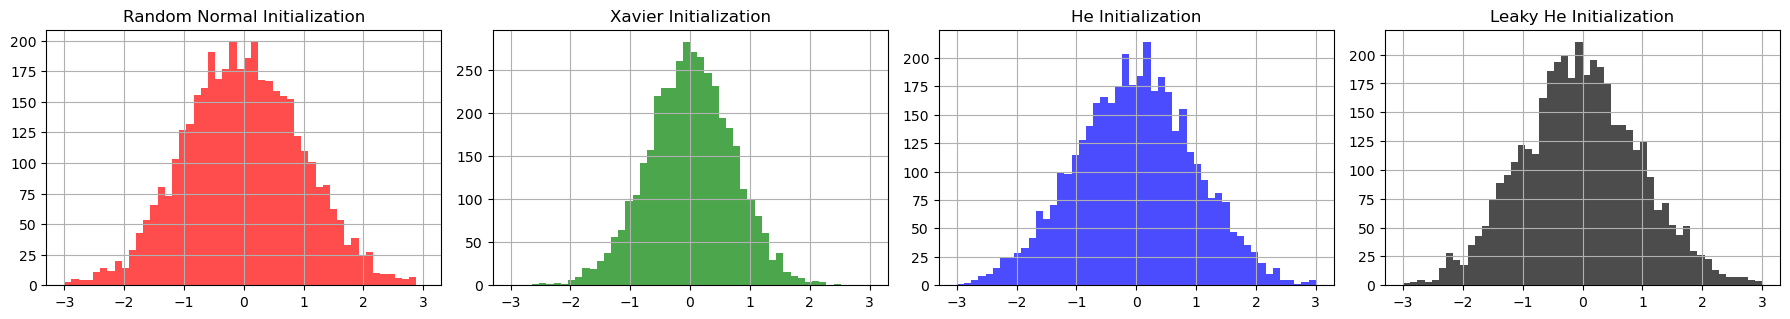

In [59]:
np.random.seed(96)

# Define input and output sizes
input_size, output_size, bins = 2, 2000, 50

# LeakyReLU negative slope
alpha = 0.01

# Random normal initialization
weights_random = np.random.randn(input_size, output_size)

# Xavier (Glorot) initialization
weights_xavier = np.random.randn(input_size, output_size) * np.sqrt(1. / input_size)

# He initialization
weights_he = np.random.randn(input_size, output_size) * np.sqrt(2. / input_size)

# Leaky He init
weights_leaky_he = np.random.randn(input_size, output_size) * np.sqrt(2. / ((1 + alpha**2) * input_size))

# Plotting the histograms for the weights initialized by different methods
plt.figure(figsize=(18, 6))

# Random init plot
plt.subplot(2, 4, 1)
plt.hist(weights_random.flatten(), range=[-3, 3], bins=bins, color='red', alpha=0.7)
plt.title('Random Normal Initialization')
plt.grid(True)

# Xavier init plot
plt.subplot(2, 4, 2)
plt.hist(weights_xavier.flatten(), range=[-3, 3], bins=bins, color='green', alpha=0.7)
plt.title('Xavier Initialization')
plt.grid(True)

# He initialization plot
plt.subplot(2, 4, 3)
plt.hist(weights_he.flatten(), range=[-3, 3], bins=bins, color='blue', alpha=0.7)
plt.title('He Initialization')
plt.grid(True)

# Leaky He initialization plot
plt.subplot(2, 4, 4)
plt.hist(weights_leaky_he.flatten(), range=[-3, 3], bins=bins, color='black', alpha=0.7)
plt.title('Leaky He Initialization')
plt.grid(True)

plt.tight_layout()
plt.show()

# Universal Parameter implementation

In [1]:
import numpy as np
from typing import Literal

def parameter(
    input_size: int,
    output_size: int,
    init_method: Literal["xavier", "he", "he_leaky", "normal", "uniform"] = "xavier",
    gain: float = 1,
    alpha: float = 0.01
) -> np.ndarray:
    """
    Initialize weights using specified initialization method.

    Args:
        input_size (int): Number of input neurons.
        output_size (int): Number of output neurons.
        init_method (str): Method of initialization ("xavier", "he", "he_leaky", "normal", "uniform").
        gain (float): Scaling factor for weight initialization.
        alpha (float): Slope for Leaky ReLU in "he_leaky" initialization.

    Returns:
        np.ndarray: The initialized weight matrix.
    
    Raises:
        ValueError: If the initialization method is unknown.
    """
    weights = np.random.randn(input_size, output_size)

    if init_method == "xavier":
        std = gain * np.sqrt(1.0 / input_size)
        return std * weights
    if init_method == "he":
        std = gain * np.sqrt(2.0 / input_size)
        return std * weights
    if init_method == "he_leaky":
        std = gain * np.sqrt(2.0 / (1 + alpha**2) * (1 / input_size))
        return std * weights
    if init_method == "normal":
        return gain * weights
    if init_method == "uniform":
        return gain * np.random.uniform(-1, 1, size=(input_size, output_size))

    raise ValueError(f"Unknown initialization method: {init_method}")


class Parameter:
    """
    A class to represent and initialize neural network parameters (weights).
    
    Attributes:
        gain (float): Scaling factor for weight initialization.
        input_size (int): Number of input neurons.
        output_size (int): Number of output neurons.
    
    Methods:
        he(): Initializes weights using He initialization.
        he_leaky(alpha): Initializes weights using He initialization with Leaky ReLU.
        xavier(): Initializes weights using Xavier initialization.
        random(): Initializes weights with a normal distribution.
        uniform(): Initializes weights with a uniform distribution.
    """
    def __init__(self, input_size: int, output_size: int, gain: float = 1):
        """
        Initialize the Parameter object with input size, output size, and scaling factor.

        Args:
            input_size (int): Number of input neurons.
            output_size (int): Number of output neurons.
            gain (float): Scaling factor for initialization.
        """
        self.input_size = input_size
        self.output_size = output_size
        self.gain = gain

    def he(self) -> np.ndarray:
        """
        Initializes weights using He initialization (for ReLU activations).

        Returns:
            np.ndarray: The initialized weight matrix.
        """
        return parameter(self.input_size, self.output_size, "he", self.gain)

    def he_leaky(self, alpha: float = 0.01) -> np.ndarray:
        """
        Initializes weights using He initialization with Leaky ReLU.

        Args:
            alpha (float): Slope of Leaky ReLU.

        Returns:
            np.ndarray: The initialized weight matrix.
        """
        return parameter(self.input_size, self.output_size, "he_leaky", self.gain, alpha)

    def xavier(self) -> np.ndarray:
        """
        Initializes weights using Xavier initialization.

        Returns:
            np.ndarray: The initialized weight matrix.
        """
        return parameter(self.input_size, self.output_size, "xavier", self.gain)

    def random(self) -> np.ndarray:
        """
        Initializes weights with a standard normal distribution.

        Returns:
            np.ndarray: The initialized weight matrix.
        """
        return parameter(self.input_size, self.output_size, "normal", self.gain)

    def uniform(self) -> np.ndarray:
        """
        Initializes weights using a uniform distribution.

        Returns:
            np.ndarray: The initialized weight matrix.
        """
        return parameter(self.input_size, self.output_size, "uniform", self.gain)


In [3]:
param = Parameter(input_size=1, output_size=10, gain=0.1)
weights = param.he()  # Will use "he" initialization
weights

array([[-0.13668641,  0.06869297,  0.14488719,  0.13556128, -0.10379101,
        -0.02760059, -0.20395249,  0.08597498, -0.11700688, -0.21882887]])